In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats

In [57]:
def plot_correlation(x, y, data, x_err, y_err, title=None, color=None, kind='joint', ax=None):
    # Extract only pKa values.
    x_error = data.loc[:, x_err]
    y_error = data.loc[:, y_err]
    data = data[[x, y]]

    # Find extreme values to make axes equal.
    min_limit = np.ceil(min(data.min()) - 2)
    max_limit = np.floor(max(data.max()) + 2)
    axes_limits = np.array([min_limit, max_limit])

    if kind == 'joint':
        grid = sns.jointplot(x=x, y=y, data=data,
                             kind='reg', joint_kws={'ci': None}, stat_func=None,
                             xlim=axes_limits, ylim=axes_limits, color=color)
        
        #grid.fig.errorbar(x_error, y_error, fmt='bo',ecolor='y', capthick='2', label='SEM')
        
        ax = grid.ax_joint
        grid.fig.subplots_adjust(top=0.95)
        grid.fig.suptitle(title)
    elif kind == 'reg':
        ax = sns.regplot(x=x, y=y, data=data, color=color, ax=ax)
        
        
        ax.set_title(title)

    # Add diagonal line.
    ax.plot(axes_limits, axes_limits, ls='--', c='black', alpha=0.8, lw=0.7)

    # Add shaded area for 0.5-1 pKa error.
    palette = sns.color_palette('BuGn_r')
    ax.fill_between(axes_limits, axes_limits - 0.5, axes_limits + 0.5, alpha=0.2, color=palette[2])
    ax.fill_between(axes_limits, axes_limits - 1, axes_limits + 1, alpha=0.2, color=palette[3])

In [129]:
x = np.array([1, 2, 3, 4])
y = np.array([2, 4, 6, 8])
x_error = np.array([0.01, 0.02, 0.03, 0.06])
y_error = np.array([0.5, 1.5, 2.5, 0.5])

data= pd.DataFrame({"x": x, "x SEM": x_error, "y": y, "y SEM": y_error})
data

,x,x SEM,y,y SEM
0,1,0.01,2,0.5
1,2,0.02,4,1.5
2,3,0.03,6,2.5
3,4,0.06,8,0.5


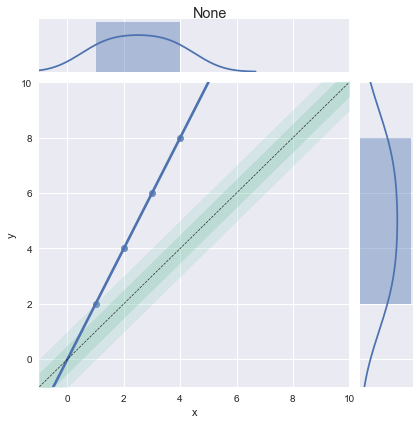

In [130]:
plt.close()
plot_correlation(x="x", y="y",data = data, x_err="x SEM", y_err="y SEM")
plt.show()

axes limits:  [ -1.  10.]


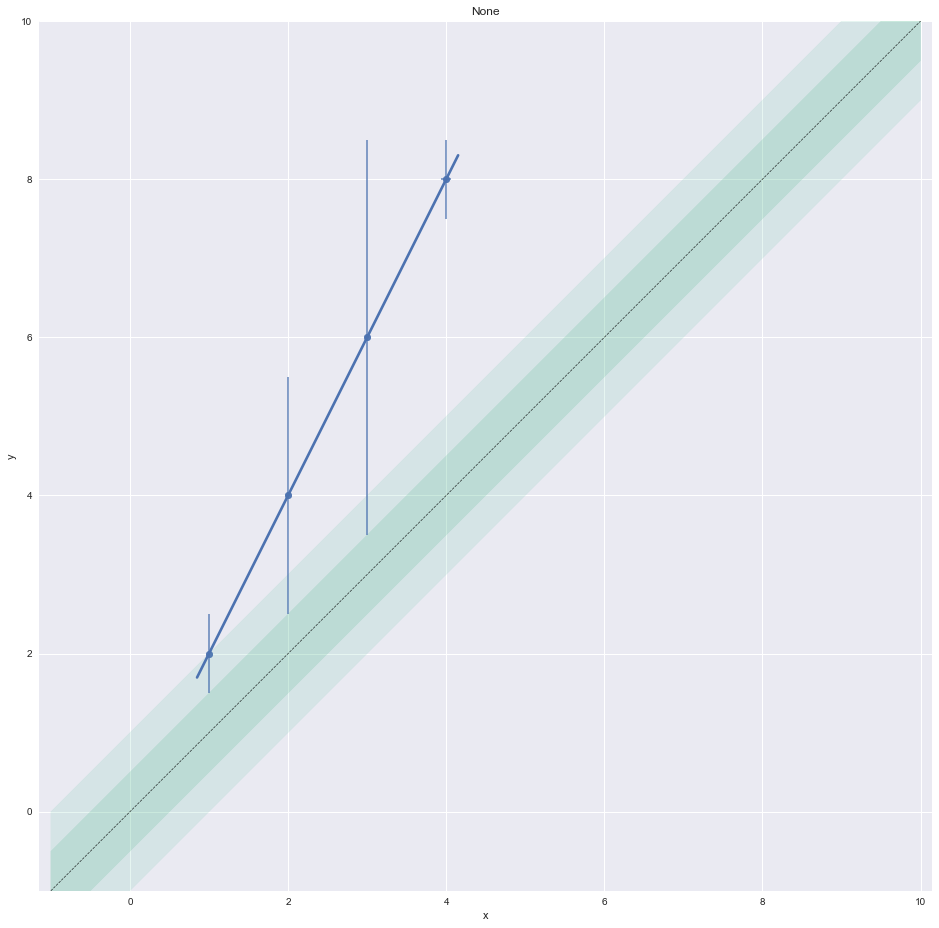

In [131]:
def plot_correlation_with_SEM(x_lab, y_lab, data, x_err, y_err, title=None, color=None, ax=None):
    # Extract only pKa values.
    x_error = data.loc[:, x_err]
    y_error = data.loc[:, y_err]
    x_values = data.loc[:, x_lab]
    y_values = data.loc[:, y_lab]
    data = data[[x_lab, y_lab]]

    # Find extreme values to make axes equal.
    min_limit = np.ceil(min(data.min()) - 2)
    max_limit = np.floor(max(data.max()) + 2)
    axes_limits = np.array([min_limit, max_limit])
    print("axes limits: ", axes_limits)
    
    # Color
    current_palette = sns.color_palette()
    sns_blue = current_palette[0]
    
    # Plot
    plt.figure(figsize=(6,6))
    grid = sns.regplot(x=x_values, y=y_values, data=data, color=color, ci=None)
    plt.errorbar(x=x_values, y= y_values, xerr = x_error, yerr=y_error,fmt = "o", ecolor=sns_blue, capthick='2', label='SEM', alpha=0.75)
    plt.title(title)
    plt.axis("equal")
    
    # Add diagonal line.
    grid.plot(axes_limits, axes_limits, ls='--', c='black', alpha=0.8, lw=0.7)

    # Add shaded area for 0.5-1 pKa error.
    palette = sns.color_palette('BuGn_r')
    grid.fill_between(axes_limits, axes_limits - 0.5, axes_limits + 0.5, alpha=0.2, color=palette[2])
    grid.fill_between(axes_limits, axes_limits - 1, axes_limits + 1, alpha=0.2, color=palette[3])
    
    plt.xlim(axes_limits)
    plt.ylim(axes_limits)
    

plt.close()
plot_correlation_with_SEM(x_lab="x", y_lab="y",data = data, x_err="x SEM", y_err="y SEM")
plt.show()